In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv("nifty50minute.csv")

In [4]:
warnings.filterwarnings('ignore')

In [5]:
data.shape

(6748, 8)

In [6]:
data.reset_index(drop=True, inplace=True)
data.drop(['Dividends'], axis=1, inplace=True)
data.drop(['Stock Splits'], axis=1, inplace=True)

In [7]:
print(data.head())
print(data.shape)
print(data.columns)

         Open        High         Low       Close  Volume
0  470.456508  481.845606  466.409860  479.446808  352730
1  476.005072  478.508166  469.893340  470.832001  115130
2  471.416106  475.587930  465.158370  465.533844  163364
3  468.078645  471.937582  462.863865  464.720306  149988
4  460.360778  466.764518  458.921519  460.089600  146026
(1674, 5)
Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [8]:
# data.plot(legend=True,subplots=True, figsize = (12, 10))
# plt.show()
# #data['Close'].plot(legend=True, figsize = (12, 6))
# #plt.show()
# #data['Volume'].plot(legend=True,figsize=(12,7))
# #plt.show()

# data.shape
# data.size
# data.describe(include='all').T
# data.dtypes
# data.nunique()


In [9]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Open,High,Low,Close,Volume
0,470.456508,481.845606,466.409860,479.446808,352730
1,476.005072,478.508166,469.893340,470.832001,115130
2,471.416106,475.587930,465.158370,465.533844,163364
3,468.078645,471.937582,462.863865,464.720306,149988
4,460.360778,466.764518,458.921519,460.089600,146026


             Open         High          Low        Close   Volume
0      470.456508   481.845606   466.409860   479.446808   352730
1      476.005072   478.508166   469.893340   470.832001   115130
2      471.416106   475.587930   465.158370   465.533844   163364
3      468.078645   471.937582   462.863865   464.720306   149988
4      460.360778   466.764518   458.921519   460.089600   146026
...           ...          ...          ...          ...      ...
1669  4240.000000  4270.049805  4197.000000  4206.000000   853004
1670  4218.000000  4220.000000  4070.000000  4101.750000  1131463
1671  4109.500000  4199.000000  4105.100098  4163.399902   706292
1672  4171.000000  4181.700195  4100.000000  4109.799805   958207
1673  4117.000000  4133.350098  4057.199951  4097.350098  1134421

[1674 rows x 5 columns]


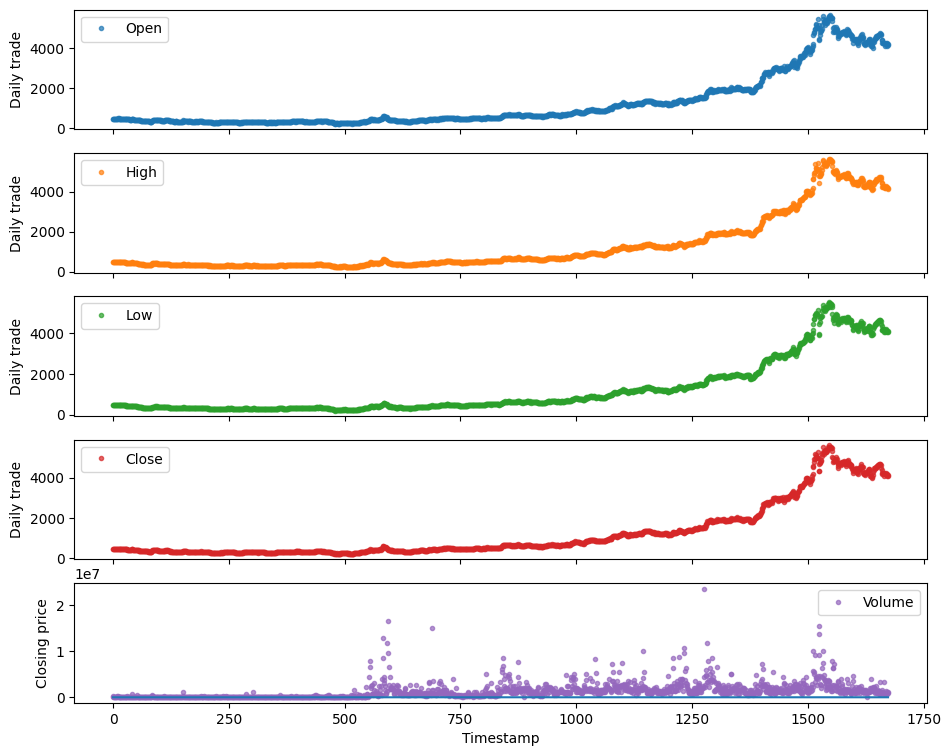

In [10]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [11]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [12]:
# cols_plot = ['Open', 'High', 'Low','Close']
# axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
# for ax in axes:
#     ax.set_ylabel('Daily trade')

In [15]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=60
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,3]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 3] - first) / first)
    for k in range(2):
        temp2.append((df.iloc[i+k + window_size, 3] - first) / first)
    X.append(np.array(temp).reshape(window_size, 1))
    Y.append(np.array(temp2).reshape(2, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,window_size,1)
test_X = test_X.reshape(test_X.shape[0],1,window_size,1)

print(len(train_X))
print(len(test_X))
     

1289
323


In [18]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],window_size ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)
     

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0542 - mae: 0.1677 - mse: 0.0542 - val_loss: 0.0136 - val_mae: 0.0837 - val_mse: 0.0136
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123 - mae: 0.0827 - mse: 0.0123 - val_loss: 0.0075 - val_mae: 0.0584 - val_mse: 0.0075
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058 - mae: 0.0546 - mse: 0.0058 - val_loss: 0.0058 - val_mae: 0.0544 - val_mse: 0.0058
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043 - mae: 0.0472 - mse: 0.0043 - val_loss: 0.0052 - val_mae: 0.0521 - val_mse: 0.0052
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 - mae: 0.0438 - mse: 0.0038 - val_loss: 0.0047 - val_mae: 0.0496 - val_mse: 0.0047
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034 - mae: 0.0413 - mse: 0.0034 - val_loss: 0.0042 - val_mae: 0.0467 - val_mse: 0.0042
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031 - mae: 0.0393 - mse: 0.0031 - val_loss:

In [144]:
# plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='val loss')
# plt.xlabel("epoch")
# plt.ylabel("Loss")
# plt.legend()

In [146]:
# plt.plot(history.history['mse'], label='train mse')
# plt.plot(history.history['val_mse'], label='val mse')
# plt.xlabel("epoch")
# plt.ylabel("Loss")
# plt.legend()

In [147]:
# plt.plot(history.history['mae'], label='train mae')
# plt.plot(history.history['val_mae'], label='val mae')
# plt.xlabel("epoch")
# plt.ylabel("Loss")
# plt.legend()

In [148]:
# # After the model has been constructed, we'll summarise it
# from tensorflow.keras.utils import plot_model
# print(model.summary())
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [19]:
model.evaluate(test_X, test_Y)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - mae: 0.0281 - mse: 0.0016 


[0.0013274463126435876, 0.0013274463126435876, 0.02587597817182541]

In [23]:
# from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
# from sklearn.metrics import r2_score
# from sklearn.metrics import max_error

# # predict probabilities for test set
# yhat_probs = model.predict(test_X, verbose=0)
# # reduce to 1d array
# yhat_probs = yhat_probs[:, 0]

# var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
# print('Variance: %f' % var)

# r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
# print('R2 Score: %f' % r2)

# var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
# print('Max Error: %f' % var2)
# Predict probabilities for the test set


yhat_probs = model.predict(test_X, verbose=0)  # Ensure this outputs (n_samples, 2)

# Verify shapes
print(f"Shape of yhat_probs: {yhat_probs.shape}")
print(f"Shape of test_Y (before reshape): {test_Y.shape}")

# Reshape test_Y to match yhat_probs
test_Y = test_Y.reshape(-1, 2)  # Adjust based on your data

# Ensure the shapes match
if test_Y.shape != yhat_probs.shape:
    raise ValueError(f"Shape mismatch: test_Y {test_Y.shape} != yhat_probs {yhat_probs.shape}")

# Evaluate metrics for each predicted value
var = explained_variance_score(test_Y, yhat_probs, multioutput='raw_values')
print(f'Explained Variance for each output: {var}')

r2 = r2_score(test_Y, yhat_probs, multioutput='raw_values')
print(f'R2 Score for each output: {r2}')

max_err = max_error(test_Y, yhat_probs)
print(f'Max Error: {max_err}')


Shape of yhat_probs: (323, 1)
Shape of test_Y (before reshape): (323, 2)


ValueError: Shape mismatch: test_Y (323, 2) != yhat_probs (323, 1)

In [22]:
yhat_probs.shape

(323, 1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


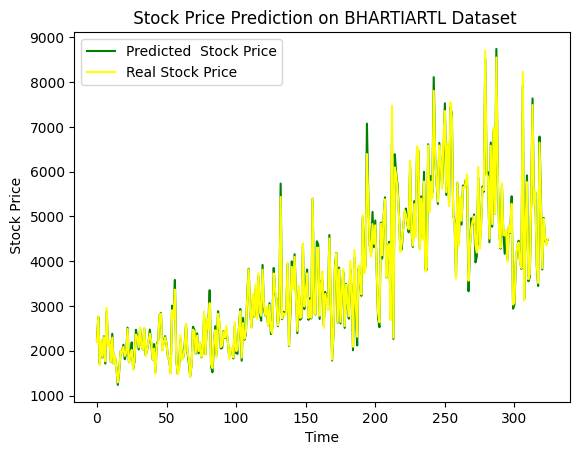

In [118]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on BHARTIARTL Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [149]:
# plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
# plt.plot(test_label, color = 'red', label = 'Real Stock Price')
# plt.title(' Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel(' Stock Price')
# plt.legend()
# plt.show()

In [119]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

     Actual Price  Predicted Price
0     2189.716844      2248.588379
1     2775.448737      2749.651855
2     1674.456922      1724.365356
3     2232.463782      2188.637451
4     1863.442641      1849.631348
..            ...              ...
320   3844.889914      3816.316162
321   4946.777066      4965.707031
322   4495.767205      4449.632324
323   4354.798759      4468.139160
324   4499.534832      4475.496582

[325 rows x 2 columns]


In [72]:
# from tabulate import tabulate
# table = tabulate(res, headers='keys', tablefmt='pretty')
# print(table)

In [150]:
# model.summary()

In [81]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))

In [82]:

yhat_probs = model.predict(test_X, verbose=0)

In [201]:
import numpy as np

# Preprocessing the 60 values from the DataFrame
def preprocess_and_predict(df, model):
    """
    Preprocess the given 60 values in the DataFrame and predict the 61st value using the trained model.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame containing stock prices. Column 2 is assumed to have the stock prices.
        model (keras.Model): The trained model for predicting the stock price.
    
    Returns:
        float: Predicted value for the 61st stock price.
    """
    # Ensure the DataFrame has at least 60 rows
    if len(df) < window_size:
        raise ValueError("The DataFrame must have at least 60 rows.")

    # Extract the first price (reference value)
    first = df.iloc[0, 2]
    
    # Normalize the 60 values
    temp = []
    for j in range(window_size):
        temp.append((df.iloc[j, 2] - first) / first)
    
    # Convert the data to the shape expected by the model
    input_data = np.array(temp).reshape(1, 1, window_size, 1)
    
    # Predict the 61st value
    normalized_prediction = model.predict(input_data)[0][0]
    
    # Denormalize the prediction
    predicted_value = normalized_prediction * first + first
    
    return predicted_value

# Example usage
# Assuming 'df' is your DataFrame containing stock prices with the second column as stock prices
# and 'model' is your trained model

# Call the function and predict
predicted_61st_value = preprocess_and_predict(df, model)
print(f"The predicted 61st value is: {predicted_61st_value}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The predicted 61st value is: 4002.2584276836005
